In [1]:
import random
import utils
import numpy as np
import matplotlib.pyplot as plt
from Game.LeducGame import *
from Environment.Environment import *
from Opponent_agent.RandAgent import *
from Opponent_agent.GreedyAgent import *
from Opponent_agent.HumanAgent import *
from Qagent.QAgent import *

stack_size=10
random_agent_qtable=None
greedy_agent_qtable=None

# Training and Testing parameters

In [2]:
epochs_number=100000
evaluate_every=5000
test_number=10000

## qAgent vs RandAgent

In [4]:
randAgent=RandAgent()
env=Environment(randAgent)
envTest=Environment(randAgent)
qagent=QAgent()


for i in range(epochs_number):

    #TEST
    if(i % evaluate_every == 0):
        perf=0
        for j in range(test_number):
            envTest.reset()
            current_player=envTest.game.get_firstplayer()
            allowed_actions=[0,1,2]
            if(current_player==1):
                envTest.agent.set_action(allowed_actions,None,envTest.game.get_game_round(), envTest.game.get_hand_player2(),envTest.game.get_boardcard())
                envTest.set_opponent_action(envTest.agent.get_action())
                reward,current_player,allowed_actions=envTest.game.step_prime(envTest.agent.get_action())
                

            while(envTest.game.is_game_over()==0):
                state=envTest.get_state()
                qagent.set_state(state)
                qagent_action=qagent.exploit_action(allowed_actions)
                reward,allowed_actions, new_state=envTest.step(qagent_action)

            if(envTest.game.is_game_over()==1):
                perf=perf+reward
        qagent.set_perf(float(perf)/test_number)    
    
    #TRAIN
    current_player=env.game.get_firstplayer()
    allowed_actions=[0,1,2]
    if(current_player==1):
        env.agent.set_action(allowed_actions,0,0,0,0)
        env.set_opponent_action(env.agent.get_action())
        reward,current_player,allowed_actions=env.game.step_prime(env.agent.get_action())

    while(env.game.is_game_over()==0):
        state=env.get_state()
        qagent.set_state(state)
        qagent_action=qagent.explore_action(allowed_actions)
        reward,allowed_actions, new_state=env.step(qagent_action)

        if(env.game.is_game_over()==1):
            qagent.update(reward, env.get_actions_hist())
    
    env.reset()
    state=env.get_state()
    qagent.set_state(state)

with np.printoptions(precision=3, suppress=True):
    print(qagent.qtable)
random_agent_qtable=qagent.qtable

[[-1.     8.223 -1.031]
 [-1.     6.379  2.415]
 [-1.     6.025  2.857]
 [-1.     7.545 -3.853]
 [-1.     8.24   0.532]
 [-1.     5.846  3.237]
 [-1.     0.    -4.439]
 [-1.     0.     0.803]
 [-1.     0.     3.997]
 [-1.     3.139  4.032]
 [-1.     3.16  -0.874]
 [-1.     2.003 -3.526]
 [-1.     3.218 -1.576]
 [-1.     4.298  5.387]
 [-1.     3.383  2.116]
 [-1.     4.394  0.898]
 [-1.     2.589  0.489]
 [-1.     3.888  4.518]
 [-0.989  0.987  8.083]
 [-1.    -0.659 -3.991]
 [-0.999 -0.84  -1.968]
 [-1.    -0.661 -3.264]
 [-0.975  0.977  6.665]
 [-1.     0.455  1.325]
 [-1.     0.34   2.822]
 [-1.     0.221  1.347]
 [-0.991  0.975  4.706]
 [-0.999  0.     9.996]
 [-1.     0.    -8.502]
 [-1.     0.    -7.304]
 [-1.     0.    -7.428]
 [-1.     0.     9.996]
 [-1.     0.     5.616]
 [-1.     0.     3.462]
 [-1.     0.     0.583]
 [-0.999  0.     9.997]]


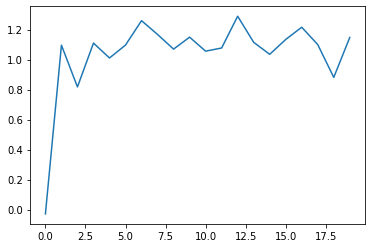

In [5]:
plt.plot(qagent.perf)

## qAgent vs GreedyAgent

In [7]:
greedy=GreedyAgent()
env=Environment(greedy)
envTest=Environment(greedy)
qagent=QAgent()


for i in range(epochs_number):

    #TEST
    if(i % evaluate_every == 0):
        perf=0
        for j in range(test_number):
            envTest.reset()
            current_player=envTest.game.get_firstplayer()
            allowed_actions=[0,1,2]
            if(current_player==1):
                envTest.agent.set_action(allowed_actions,None,envTest.game.get_game_round(), envTest.game.get_hand_player2(),envTest.game.get_boardcard())
                envTest.set_opponent_action(envTest.agent.get_action())
                reward,current_player,allowed_actions=envTest.game.step_prime(envTest.agent.get_action())

            while(envTest.game.is_game_over()==0):
                state=envTest.get_state()
                qagent.set_state(state)
                qagent_action=qagent.exploit_action(allowed_actions)
                reward,allowed_actions, new_state=envTest.step(qagent_action)

            if(envTest.game.is_game_over()==1):
                perf=perf+reward
        qagent.set_perf(float(perf)/test_number)    
    
    #TRAIN
    current_player=env.game.get_firstplayer()
    allowed_actions=[0,1,2]
    if(current_player==1):
        env.agent.set_action(allowed_actions,None,env.game.get_game_round(), env.game.get_hand_player2(),env.game.get_boardcard())
        env.set_opponent_action(env.agent.get_action())
        reward,current_player,allowed_actions=env.game.step_prime(env.agent.get_action())

    while(env.game.is_game_over()==0):
        state=env.get_state()
        qagent.set_state(state)
        qagent_action=qagent.explore_action(allowed_actions)
        reward,allowed_actions, new_state=env.step(qagent_action)

        if(env.game.is_game_over()==1):
            qagent.update(reward, env.get_actions_hist())
    
    env.reset()
    state=env.get_state()
    qagent.set_state(state)

with np.printoptions(precision=3, suppress=True):
    print(qagent.qtable)
random_agent_qtable=qagent.qtable

[[ -1.      9.251  -3.204]
 [ -1.      8.59   -4.039]
 [ -1.      8.169   1.081]
 [ -1.      7.433  -0.119]
 [ -1.      9.047  -0.095]
 [ -1.      6.315   1.548]
 [ -1.      0.     -2.473]
 [ -1.      0.     -5.741]
 [ -1.      0.      4.04 ]
 [ -1.      3.701   1.38 ]
 [ -1.      4.426  -6.742]
 [ -1.      2.227  -0.529]
 [ -1.      4.423  -4.488]
 [ -1.      1.965   2.421]
 [ -1.      3.182  -1.078]
 [ -1.      3.543  -1.323]
 [ -1.      5.583  -1.83 ]
 [ -1.      1.      1.   ]
 [ -1.      1.      1.405]
 [ -1.     -0.695  -3.619]
 [ -1.     -0.788   1.   ]
 [ -1.     -0.568  -0.522]
 [ -1.      1.      2.534]
 [ -1.      0.368   1.   ]
 [ -1.      0.715   0.936]
 [ -1.      0.918  -1.815]
 [ -1.      1.      1.   ]
 [ -1.      0.     10.   ]
 [ -1.      0.    -10.   ]
 [ -1.      0.    -10.   ]
 [ -1.      0.     -9.025]
 [ -0.966   0.      9.477]
 [ -1.      0.     -8.565]
 [ -1.      0.     -3.236]
 [ -1.      0.     -7.721]
 [ -0.995   0.      9.985]]


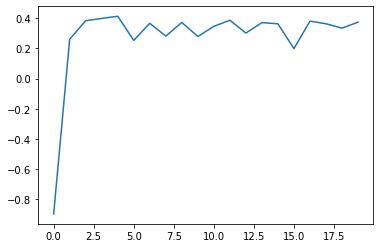

In [8]:
plt.plot(qagent.perf)

## qAgent (trained with a random agent) vs HumanAgent

In [9]:
humanAgent=HumanAgent()
env=Environment(humanAgent)
qagent=QAgent()
qagent.set_qtable(random_agent_qtable)

print("How to play?\n\nFor the actions:\n\t- 0 : Fold\n\t- 1 : Check\n\t- 2 : Push\n\nFor the cards:\n\t- 0 : Jack\n\t- 1 : Queen\n\t- 2 : King\n\n ")
for i in range(1):
    allowed_actions=[0,1,2]
    current_player=env.game.get_firstplayer()
    while(env.game.is_game_over()==0):
        state=env.get_state()
        qagent.set_state(state)
        
        if (current_player==1):
            env.agent.set_action(allowed_actions,None, env.game.get_game_round(), env.game.get_hand_player2(),env.game.get_boardcard())
            env.set_opponent_action(env.agent.get_action())
            reward,current_player,allowed_actions=env.game.step_prime(env.agent.get_action())
            if(env.game.is_game_over()==1):
                print("You loose!! He has a:", env.game.get_hand_player1(), "\n\n")
        if(env.game.is_game_over()==0):
            state=env.get_state()
            qagent.set_state(state)
            qagent_action=qagent.exploit_action(allowed_actions)
            reward,allowed_actions, new_state=env.step(qagent_action)
            if(env.game.is_game_over()==1):
                if(reward<0):
                    print("His action was: ", qagent_action, "\nHe has a: ",env.game.get_hand_player1(), "\nCongratulation, you win !!!\n\n" )
                elif(reward>0):
                    print("His action was: ", qagent_action, "\nHe has a: ",env.game.get_hand_player1(), "\nSorry, you loose !!!\n\n" )
                elif(reward==0):
                    print("His action was: ", qagent_action, "\nHe has a: ",env.game.get_hand_player1(), "\nIt's a draw !!!\n\n" )
                qagent.update(reward, env.get_actions_hist())
            qagent.set_state(new_state)

    
    env.reset()
    

How to play?

For the actions:
	- 0 : Fold
	- 1 : Check
	- 2 : Push

For the cards:
	- 0 : Jack
	- 1 : Queen
	- 2 : King

 
Your card = 0 
Action of the QAgent =  1 


Please enter an action :(0,1 or 2)
1



Your card = 0 
Action of the QAgent =  1 
Boardcard =  2  


Please enter an action :(0,1 or 2)
1



His action was:  1 
He has a:  0 
It's a draw !!!




## qAgent (trained with a greedy agent) vs HumanAgent

In [10]:
humanAgent=HumanAgent()
env=Environment(humanAgent)
qagent=QAgent()
qagent.set_qtable(greedy_agent_qtable)

    
print("How to play?\n\nFor the actions:\n\t- 0 : Fold\n\t- 1 : Check\n\t- 2 : Push\n\nFor the cards:\n\t- 0 : Jack\n\t- 1 : Queen\n\t- 2 : King\n\n ")
for i in range(1):
    allowed_actions=[0,1,2]
    current_player=env.game.get_firstplayer()
    while(env.game.is_game_over()==0):
        state=env.get_state()
        qagent.set_state(state)
        
        if (current_player==1):
            env.agent.set_action(allowed_actions,None, env.game.get_game_round(), env.game.get_hand_player2(),env.game.get_boardcard())
            env.set_opponent_action(env.agent.get_action())
            reward,current_player,allowed_actions=env.game.step_prime(env.agent.get_action())
            if(env.game.is_game_over()==1):
                print("You loose!! He has a:", env.game.get_hand_player1(), "\n\n")
        if(env.game.is_game_over()==0):
            state=env.get_state()
            qagent.set_state(state)
            qagent_action=qagent.exploit_action(allowed_actions)
            reward,allowed_actions, new_state=env.step(qagent_action)
            if(env.game.is_game_over()==1):
                if(reward<0):
                    print("His action was: ", qagent_action, "\nHe has a: ",env.game.get_hand_player1(), "\nCongratulation, you win !!!\n\n" )
                elif(reward>0):
                    print("His action was: ", qagent_action, "\nHe has a: ",env.game.get_hand_player1(), "\nSorry, you loose !!!\n\n" )
                elif(reward==0):
                    print("His action was: ", qagent_action, "\nHe has a: ",env.game.get_hand_player1(), "\nIt's a draw !!!\n\n" )
                qagent.update(reward, env.get_actions_hist())
            qagent.set_state(new_state)

    
    env.reset()
    

How to play?

For the actions:
	- 0 : Fold
	- 1 : Check
	- 2 : Push

For the cards:
	- 0 : Jack
	- 1 : Queen
	- 2 : King

 
Your card =  2 


Please enter an action :(0,1 or 2)
1



Your card = 2 
Boardcard =  0 


Please enter an action :(0,1 or 2)
1



His action was:  1 
He has a:  1 
Congratulation, you win !!!




In [4]:
game = LeducGame()
print(game)
game.step_prime(1)
print(game)
game.step_prime(1)
print(game)
game.step_prime(1)
print(game)
game.step_prime(2)
print(game)
game.step_prime(2)
print(game)

FirstPlayer = 0 
Hand1 = 1 
Hand2 = 2 
Board = 0 
Deck = [0, 1, 2]
Result = -1
Stack1=9
Stack2=9
Pot=2
Step=0
Round=0
GameIsOver=0
Current_player0


FirstPlayer = 0 
Hand1 = 1 
Hand2 = 2 
Board = 0 
Deck = [0, 1, 2]
Result = -1
Stack1=9
Stack2=9
Pot=2
Step=1
Round=0
GameIsOver=0
Current_player1


FirstPlayer = 0 
Hand1 = 1 
Hand2 = 2 
Board = 0 
Deck = [0, 1, 2]
Result = -1
Stack1=9
Stack2=9
Pot=2
Step=0
Round=1
GameIsOver=0
Current_player0


FirstPlayer = 0 
Hand1 = 1 
Hand2 = 2 
Board = 0 
Deck = [0, 1, 2]
Result = -1
Stack1=9
Stack2=9
Pot=2
Step=1
Round=1
GameIsOver=0
Current_player1


FirstPlayer = 0 
Hand1 = 1 
Hand2 = 2 
Board = 0 
Deck = [0, 1, 2]
Result = -1
Stack1=9
Stack2=0
Pot=12
Step=2
Round=1
GameIsOver=0
Current_player0


FirstPlayer = 0 
Hand1 = 1 
Hand2 = 2 
Board = 0 
Deck = [0, 1, 2]
Result = -1
Stack1=0
Stack2=0
Pot=20
Step=2
Round=1
GameIsOver=1
Current_player1


